In [52]:
import numpy as np
import json
import csv

Z = np.genfromtxt('../data/i2i_impute_logloss_realfill_Z5.csv', delimiter=',', skip_header=True)
Z = Z[:, 1:]
m, n = Z.shape

missing = np.genfromtxt('../data/all_samples_filtered.csv', delimiter=',', skip_header=True)
missing = np.isnan(missing[:, 1:])
print(missing)

adir_indices = range(0, 77)
ados_indices = range(77, 123)

adir_test_indices = np.loadtxt('../data/adir_test_indices.csv').astype(int)
ados_test_indices = np.loadtxt('../data/ados_test_indices.csv').astype(int)

print(adir_test_indices.shape)
print(ados_test_indices.shape)

adir_train_indices = list(set(range(m))-set(adir_test_indices))
ados_train_indices = list(set(range(m))-set(ados_test_indices))

with open('../data/all_samples_filtered_labels.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    key_to_index = dict([(h, i) for i, h in enumerate(header[1:])])
    data_labels = [x[1:] for x in reader]
    
def get_label(i, key):
    return data_labels[i][key_to_index[key]]
        
print(get_label(0, 'ADIR:diagnosis'))

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True False ...,  True  True  True]
 ..., 
 [False  True False ..., False False False]
 [False  True False ..., False False False]
 [False  True False ..., False False False]]
(671,)
(672,)
Autism


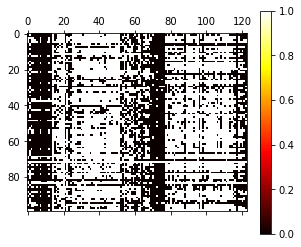

In [53]:
import matplotlib.pyplot as plt
cay = plt.matshow(Z[ados_train_indices, :][:100, :], cmap='hot')
plt.colorbar(cay)
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

train_errors = []
test_errors = []
train_correct = 0
train_attempts = 0
test_correct = 0
test_attempts = 0
overall_predictions = []
overall_real = []

adir_Z = Z[:, adir_indices]
ados_Z = Z[:, ados_indices]

for i in ados_indices:
    train_data = adir_Z[ados_train_indices, :]
    test_data = adir_Z[ados_test_indices, :]
    train_y = Z[ados_train_indices, i]
    test_y = Z[ados_test_indices, i]
    
    missing_train_y = missing[ados_train_indices, i]
    missing_test_y = missing[ados_test_indices, i]
        
    model = LogisticRegression(fit_intercept=False)
    model.fit(train_data, train_y)
    
    train_predictions = model.predict(train_data[~missing_train_y])
    train_num_correct = sum([x for x in train_predictions * train_y[~missing_train_y] if x == 1])
    train_num_attempts = train_predictions.shape[0]
    train_errors.append(1.0*train_num_correct/train_num_attempts)
    train_correct += train_num_correct
    train_attempts += train_num_attempts
    
    test_predictions = model.predict(test_data[~missing_test_y])
    print(len(test_predictions))
    
    overall_predictions.extend(test_predictions)
    overall_real.extend(test_y[~missing_test_y])
    fpr, tpr, thresholds = metrics.roc_curve(test_y[~missing_test_y], test_predictions, pos_label=1)
    plt.plot(fpr, tpr, '-', c='blue')
    test_num_correct = sum([x for x in test_predictions * test_y[~missing_test_y] if x == 1])
    test_num_attempts = test_predictions.shape[0]
    test_errors.append(1.0*test_num_correct/test_num_attempts)
    test_correct += test_num_correct
    test_attempts += test_num_attempts

    print(train_errors[-1], test_errors[-1], train_num_attempts, test_num_attempts)
print('Average Accuracy', 1.0*train_correct/train_attempts, 1.0*test_correct/test_attempts)

fpr, tpr, thresholds = metrics.roc_curve(overall_real, overall_predictions, pos_label=1)
plt.plot(fpr, tpr, '-', c='red')
plt.show()
    
    
    

561
0.399420604744 0.397504456328 11046 561
518
0.821435575603 0.828185328185 10198 518
496
0.242957022414 0.25 9726 496
455
0.703436619718 0.738461538462 8875 455
267
0.255553515697 0.265917602996 5447 267
267
0.745684906353 0.704119850187 5446 267
275
0.772318868285 0.778181818182 5231 275
267
0.492809734513 0.513108614232 5424 267
363
0.755690440061 0.771349862259 7249 363
525
0.575452716298 0.586666666667 10437 525
169
0.860280658938 0.828402366864 3278 169
158
0.244378306878 0.284810126582 3024 158
48
0.632835820896 0.729166666667 1005 48
542
0.777120870871 0.789667896679 10656 542
543
0.81592039801 0.821362799263 10653 543
72
0.544921875 0.583333333333 1536 72
531
0.462360461788 0.455743879473 10481 531
267
0.781617647059 0.812734082397 5440 267
267
0.867328188166 0.883895131086 5442 267
281
0.265983224604 0.220640569395 5365 281
253
0.852491961415 0.822134387352 4976 253
277
0.192373041344 0.187725631769 5297 277
275
0.761185468451 0.763636363636 5230 275
3
0.589928057554 0.0 13

ValueError: Found array with 0 sample(s) (shape=(0, 77)) while a minimum of 1 is required.

In [44]:
from sklearn.linear_model import LogisticRegression

train_errors = []
test_errors = []
train_correct = 0
train_attempts = 0
test_correct = 0
test_attempts = 0
for i in range(adir_Z.shape[1]):
    train_data = ados_Z[train_indices, :]
    test_data = ados_Z[test_indices, :]
    train_y = adir_Z[train_indices, i]
    test_y = adir_Z[test_indices, i]
    real_train_y = adir_data[train_indices, i]
    real_test_y = adir_data[test_indices, i]
    
    model = LogisticRegression(fit_intercept=False)
    model.fit(train_data, train_y)
    
    train_predictions = model.predict(train_data[real_train_y != 0])
    train_num_correct = sum([x for x in train_predictions * real_train_y[real_train_y != 0] if x == 1])
    train_num_attempts = train_predictions.shape[0]
    train_errors.append(1.0*train_num_correct/train_num_attempts)
    train_correct += train_num_correct
    train_attempts += train_num_attempts
    
    test_predictions = model.predict(test_data[real_test_y != 0])
    test_num_correct = sum([x for x in test_predictions * real_test_y[real_test_y != 0] if x == 1])
    test_num_attempts = test_predictions.shape[0]
    test_errors.append(1.0*test_num_correct/test_num_attempts)
    test_correct += test_num_correct
    test_attempts += test_num_attempts

    print(train_errors[-1], test_errors[-1], train_num_attempts, test_num_attempts)
print('Average Accuracy', 1.0*train_correct/train_attempts, 1.0*test_correct/test_attempts)
    
    
    

0.813216656608 0.8 6628 745
0.714695752009 0.734299516908 1742 207
0.818767123288 0.815136476427 7300 806
0.826614001634 0.841911764706 7342 816
0.950842696629 0.949790794979 6408 717
0.924013495673 0.92005242464 6817 763
0.743328100471 0.74025974026 1274 154
0.757125712571 0.737333333333 6666 750
0.957456404089 0.949265687583 6652 749
0.948356102687 0.949129852744 6661 747
0.942731943185 0.934316353887 6618 746
0.929771908764 0.931726907631 6664 747
0.781163006496 0.76275862069 6466 725
0.769095182139 0.747572815534 1702 206
0.674764181419 0.655172413793 7739 870
0.848871807587 0.852842809365 8066 897
0.690010167768 0.664009111617 7868 878
0.612945406996 0.597968069666 6118 689
0.839919417325 0.829370629371 6453 715
0.926754987056 0.925207756233 6567 722
0.961687170475 0.966876971609 5690 634
0.652409830833 0.65 6266 700
0.657700508447 0.627565982405 6097 682
0.650031786395 0.61087267525 6292 699
0.580670799555 0.57 6291 700
0.861373250895 0.871201157742 6146 691
0.650734038921 0.6575